In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("netflix.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Descriptions of the columns:
    

Show_id: Unique ID for every Movie / Tv Show
    
Type: Identifier - A Movie or TV Show
    
Title: Title of the Movie / Tv Show
    
Director: Director of the Movie
    
Cast: Actors involved in the movie/show
    
Country: Country where the movie/show was produced
    
Date_added: Date it was added on Netflix
    
Release_year: Actual Release year of the movie/show
    
Rating: TV Rating of the movie/show
    
Duration: Total Duration - in minutes or number of seasons
    
Listed_in: Genre
    
Description: The summary description

<h3>Problem Statement :<h3>
    
Come up with data backed insights and recommendations for the Netflix team to improve
their business mode


In [4]:
print("There are ",df.shape[0]," datapoints and ",df.shape[1]," features")

There are  8807  datapoints and  12  features


In [5]:
df.info() #all the non null features and data type shown

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe() #gives all the statistical values of integer data type by default

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.describe(include='object') #gives all the statistical values of included data types 

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [8]:
# top 20 countries of movie/TV shows production

df["country"].value_counts()[:20]

United States                    2818
India                             972
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Germany                            67
Name: country, dtype: int64

Insight: United States has the most number of movies and TV shows

In [9]:
# number of movies and Tv- shows

df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [10]:
# top 20 genres

df["listed_in"].value_counts()[:20]

Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Kids' TV                                             220
Children & Family Movies                             215
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               138
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Independent M

Insight: Dramas, International Movies, Documentaries and Stand-up Comedies are the top generes.

In [11]:
# most occuring ratings

df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Insight: There are 3 anomalous ratings: 74 min, 84 min, 66 min, could be outliers

In [12]:
df["duration"].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

Insight: Single Season series are mostly watched

<h3>Treating null value<h3>

In [13]:
#gives true in places where there is null value in entire data set

df.isnull() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#gives null values in each column

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
#gives percentage of null values per column

df.isnull().sum()/(len(df))*100 

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

<h6>To remove the null values it is suggested to create another dataframe to store the dataset where the functions can be performed. Tampering with the original data set may lead to loss of information from the main dataset<h6>

In [16]:
#copying the entire dataset into another dataframe 'data'.

data = df.copy()

In [17]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
# remove null values is not inplace and by default remove values row wise and removes if atleast one null value is present

data.dropna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [19]:
data.head() #precautionary measure doesnt allow the dropna() to remove data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
data.dropna(inplace=True) #we need to add inplace=True as a confirmation to remove inplace data

In [21]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [22]:
data.isnull().sum() #null value removed

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [23]:
# gives the genre of the movies and TV shows from the data set after removing null values

data["listed_in"]

7       Dramas, Independent Movies, International Movies
8                           British TV Shows, Reality TV
9                                       Comedies, Dramas
12                          Dramas, International Movies
24       Comedies, International Movies, Romantic Movies
                              ...                       
8801             Dramas, International Movies, Thrillers
8802                      Cult Movies, Dramas, Thrillers
8804                             Comedies, Horror Movies
8805                  Children & Family Movies, Comedies
8806      Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 5332, dtype: object

<h4>Finding out most of the directors preferred genre of movies/TV shows.<h4> 

In [24]:
#creating a copy and removing the null values

data = df.copy()
data.dropna(inplace=True)

In [25]:
data_dir_genre = data[["director","listed_in"]]

data_dir_genre.head()

,director,listed_in
7,Haile Gerima,"Dramas, Independent Movies, International Movies"
8,Andy Devonshire,"British TV Shows, Reality TV"
9,Theodore Melfi,"Comedies, Dramas"
12,Christian Schwochow,"Dramas, International Movies"
24,S. Shankar,"Comedies, International Movies, Romantic Movies"


In [26]:
data_dir_genre["listed_in"] = data_dir_genre["listed_in"].str.split(", ") #creating list from series data type of listed_in

In [27]:
data_dir_genre.head()

,director,listed_in
7,Haile Gerima,"[Dramas, Independent Movies, International Mov..."
8,Andy Devonshire,"[British TV Shows, Reality TV]"
9,Theodore Melfi,"[Comedies, Dramas]"
12,Christian Schwochow,"[Dramas, International Movies]"
24,S. Shankar,"[Comedies, International Movies, Romantic Movies]"


In [28]:
data_dir_genre = data_dir_genre.explode("listed_in") #breaking the list

In [29]:
data_dir_genre.head()

,director,listed_in
7,Haile Gerima,Dramas
7,Haile Gerima,Independent Movies
7,Haile Gerima,International Movies
8,Andy Devonshire,British TV Shows
8,Andy Devonshire,Reality TV


In [30]:
data_dir_genre["listed_in"].value_counts() #here we get the genres most preferred by directors

International Movies            2369
Dramas                          2293
Comedies                        1553
Action & Adventure               806
Independent Movies               740
Romantic Movies                  579
Thrillers                        547
Children & Family Movies         503
Documentaries                    391
Horror Movies                    336
Stand-Up Comedy                  294
Music & Musicals                 292
Sci-Fi & Fantasy                 236
Sports Movies                    156
Classic Movies                   108
International TV Shows            87
LGBTQ Movies                      80
Cult Movies                       69
Anime Features                    61
Faith & Spirituality              58
TV Dramas                         52
Crime TV Shows                    38
TV Comedies                       30
British TV Shows                  21
Romantic TV Shows                 21
Movies                            20
Docuseries                        14
K

In [31]:
data_dir_genre.groupby("listed_in").count().reset_index().sort_values("director",ascending=False)
#here we sort the values asper director's preference in genres and index it. 

,listed_in,director
16,International Movies,2369
12,Dramas,2293
7,Comedies,1553
0,Action & Adventure,806
15,Independent Movies,740
24,Romantic Movies,579
41,Thrillers,547
4,Children & Family Movies,503
10,Documentaries,391
14,Horror Movies,336


Insight: It can be seen from the table that International Movies, Dramas and Comedies are the most favourite genres of
directors

<h4>Finding the relationship between directors and ratings<h4>

In [32]:
data = df.copy()
# Creating a copy of the dataset to perform the required operations

In [33]:
data_dir_rating = data[["director","rating"]]
data_dir_rating.head()

,director,rating
0,Kirsten Johnson,PG-13
1,NaN,TV-MA
2,Julien Leclercq,TV-MA
3,NaN,TV-MA
4,NaN,TV-MA


In [34]:
data_dir_rating.dropna(inplace=True) # removing null values
data_dir_rating["director"] = data_dir_rating["director"].str.split(", ")
data_dir_rating = data_dir_rating.explode("director")
data_dir_rating

,director,rating
0,Kirsten Johnson,PG-13
2,Julien Leclercq,TV-MA
5,Mike Flanagan,TV-MA
6,Robert Cullen,PG
6,JosÃ© Luis Ucha,PG
...,...,...
8801,Majid Al Ansari,TV-MA
8802,David Fincher,R
8804,Ruben Fleischer,R
8805,Peter Hewitt,PG


In [35]:
data_dir_rating.groupby("rating").count().reset_index().sort_values("director",ascending=False)[:5]

,rating,director
11,TV-MA,2456
9,TV-14,1592
8,R,858
12,TV-PG,607
7,PG-13,523


Insight: TV-MA, TV-14, R, TV-PG, PG-13 are the 5 most common TV ratings given to the directors' movies and series.

<h4>Finding out which director casted the most no. of actors<h4>

In [36]:
data_dir_cast = data[["director","cast"]]
data_dir_cast.dropna(inplace=True) #removing the null values
data_dir_cast.head()

,director,cast
2,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
5,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H..."
6,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ..."
7,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D..."
8,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho..."


In [37]:
data_dir_cast["cast"] = data_dir_cast["cast"].str.split(", ")
data_dir_cast = data_dir_cast.explode("cast") 
data_dir_cast.head()

,director,cast
2,Julien Leclercq,Sami Bouajila
2,Julien Leclercq,Tracy Gotoas
2,Julien Leclercq,Samuel Jouy
2,Julien Leclercq,Nabiha Akkari
2,Julien Leclercq,Sofia Lesaffre


In [38]:
data_dir_cast.groupby("director").count().reset_index().sort_values('cast',ascending=False)

,director,cast
2431,Martin Scorsese,139
631,Cathy Garcia-Molina,125
3683,Steven Spielberg,121
3100,Rajiv Chilaka,119
4105,Youssef Chahine,104
...,...,...
1516,Isabelle Nanty,1
3018,Pieter-Jan De Pue,1
292,Anissa Bonnefont,1
3052,QLF,1


Insight: Martin Scorsese has casted maximum number of actors

<h4>Finding out which director has directed the most number of films<h4>

In [39]:
data_dir_title = data[["director","title"]]
data_dir_title.dropna(inplace=True)# removing null
data_dir_title["director"] = data_dir_title["director"].str.split(", ")
data_dir_title = data_dir_title.explode("director")
data_dir_title.groupby("director").count().reset_index().sort_values("title",ascending=False)

,director,title
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,RaÃºl Campos,19
4457,Suhas Kadav,16
2866,Marcus Raboy,16
...,...,...
635,Brandon Camp,1
2295,Juan Antin,1
2296,Juan Antonio de la Riva,1
2297,Juan Camilo Pinzon,1


Insight: Rajiv Chilaka has directed the most number of movies

<h4>Exclusively finding out which director has directed most number of tv shows.<h4>

In [40]:
data_tv_dir = data[data["type"]=="TV Show"][["director","title"]]
data_tv_dir.dropna(inplace=True)
data_tv_dir["director"] = data_tv_dir["director"].str.split(", ")
data_tv_dir = data_tv_dir.explode("director")
data_tv_dir.head()

,director,title
2,Julien Leclercq,Ganglands
5,Mike Flanagan,Midnight Mass
8,Andy Devonshire,The Great British Baking Show
11,Kongkiat Komesiri,Bangkok Breaking
20,Olivier Megaton,Monsters Inside: The 24 Faces of Billy Milligan


In [41]:
data_tv_dir.groupby("director").count().reset_index().sort_values("title",ascending=False)

,director,title
146,Ken Burns,3
8,Alastair Fothergill,3
259,Stan Lathan,2
140,Jung-ah Im,2
128,Joe Berlinger,2
...,...,...
98,Hong Won-ki,1
97,Hiroyuki Seshita,1
96,Hikaru Toda,1
95,HernÃ¡n Guerschuny,1


Insight: Ken Burns and Alastair Fothergill have directed the most number of TV shows.

<h4> Finding out the counties which casted maximum actors<h4>

In [42]:
data_cast_country = data[["cast","country"]]
data_cast_country.dropna(inplace = True)
data_cast_country["cast"] = data_cast_country["cast"].str.split(", ")
data_cast_country = data_cast_country.explode("cast")
data_cast_country

,cast,country
1,Ama Qamata,South Africa
1,Khosi Ngema,South Africa
1,Gail Mabalane,South Africa
1,Thabang Molaba,South Africa
1,Dillon Windvogel,South Africa
...,...,...
8806,Manish Chaudhary,India
8806,Meghna Malik,India
8806,Malkeet Rauni,India
8806,Anita Shabdish,India


In [43]:
data_cast_country.groupby("country").count().reset_index().sort_values("cast",ascending=False)[:10]

,country,cast
559,United States,19599
224,India,7214
289,Japan,2746
468,United Kingdom,2058
400,South Korea,1475
52,Canada,1259
409,Spain,1221
311,Mexico,925
454,Turkey,923
335,Nigeria,850


Insight: United States casted maximum number of actors.

<h2>Visual Analysis<h2>

In [44]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<AxesSubplot:xlabel='Type', ylabel='Frequency'>

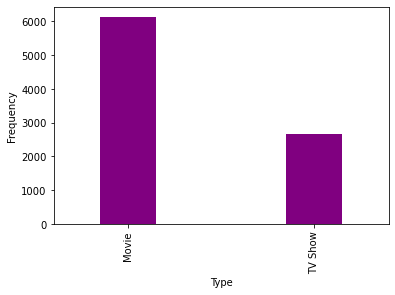

In [45]:
# PLotting the frequency of tv shows and movies

data["type"].value_counts().plot(kind="bar",xlabel="Type",ylabel="Frequency",width=0.3,color="purple")

Insight: Movies are more than TV shows

(1940.0, 2022.0)

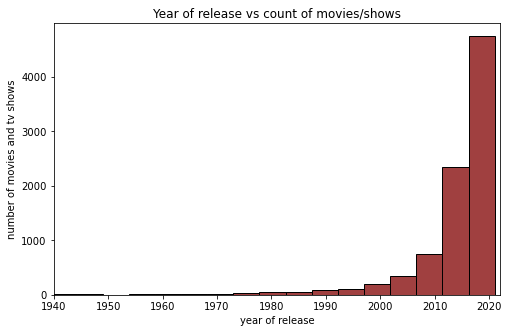

In [46]:
# Plotting the frequency of year of release

plt.figure(figsize=(8,5))
plt.title("Year of release vs count of movies/shows")
plt.xlabel("year of release")
plt.ylabel("number of movies and tv shows")
sns.histplot(x=data["release_year"],color="maroon",bins=20)
plt.xlim(1940,2022)

Insight: Maximum release is in the recent years around 2020

In [47]:
data_no_null = data.dropna()

In [48]:
data_no_null.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [49]:

movie_duration = data_no_null[data_no_null["duration"].str.endswith("min")]["duration"].tolist()

for i in range(len(movie_duration)):
    movie_duration[i] = int(movie_duration[i][0:-4])
    
movie_duration[:5]

[125, 104, 127, 166, 103]

Text(0.5, 0, 'movie duration in minutes')

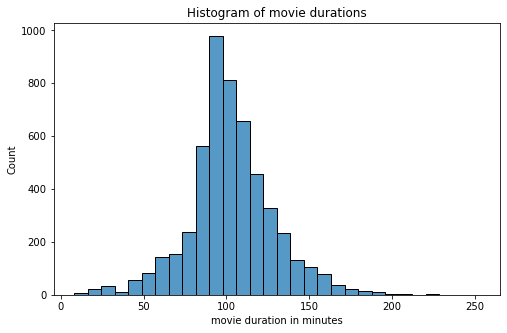

In [50]:

plt.figure(figsize=(8,5))
sns.histplot(movie_duration,bins=30)
plt.title("Histogram of movie durations")
plt.xlabel('movie duration in minutes')

Insight: Movies with the duration of 90 to 100 minutes are mostly preferred thus has maximum count

In [51]:
# Visualising the distribution of number of seasons

seasons = data_no_null[data_no_null["duration"].str.contains("Season")]["duration"].tolist()

for i in range(len(seasons)):
    seasons[i] = int(seasons[i][0])
seasons[:10]

[9, 1, 1, 2, 1, 1, 7, 2, 4, 1]

Text(0.5, 0, 'Number of Seasons')

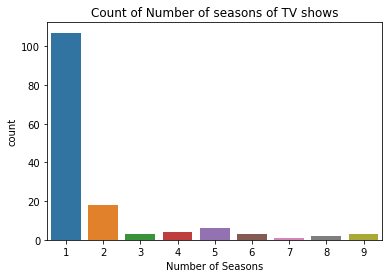

In [52]:
sns.countplot(seasons)
plt.title("Count of Number of seasons of TV shows")
plt.xlabel("Number of Seasons")

Insight: Netflix has more TV shows with single seasons which increases the variety for viewers.

Text(0.5, 1.0, 'Relationship between the ratings of movies and TV shows')

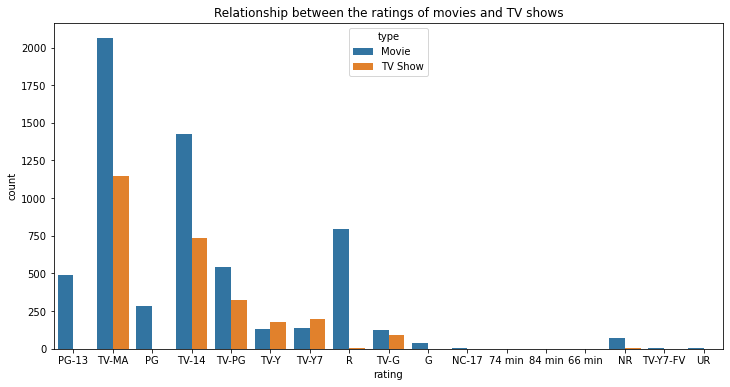

In [53]:
# Relationship between rating and count of movies and tv shows

plt.figure(figsize=(12,6))
sns.countplot(data=data,x="rating",hue="type")
plt.title("Relationship between the ratings of movies and TV shows")

In [54]:
# Visualising genres of tv shows and movies

genre_count = data_dir_genre.groupby("listed_in").count().reset_index()
genre_count.head()

,listed_in,director
0,Action & Adventure,806
1,Anime Features,61
2,Anime Series,10
3,British TV Shows,21
4,Children & Family Movies,503


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Action & Adventure'),
  Text(1, 0, 'Anime Features'),
  Text(2, 0, 'Anime Series'),
  Text(3, 0, 'British TV Shows'),
  Text(4, 0, 'Children & Family Movies'),
  Text(5, 0, 'Classic & Cult TV'),
  Text(6, 0, 'Classic Movies'),
  Text(7, 0, 'Comedies'),
  Text(8, 0, 'Crime TV Shows'),
  Text(9, 0, 'Cult Movies'),
  Text(10, 0, 'Documentaries'),
  Text(11, 0, 'Docuseries'),
  Text(12, 0, 'Dramas'),
  Text(13, 0, 'Faith & Spirituality'),
  Text(14, 0, 'Horror Movies'),
  Text(15, 0, 'Independent Movies'),
  Text(16, 0, 'International Movies'),
  Text(17, 0, 'International TV Shows'),
  Text(18, 0, "Kids' TV"),
  Text(19, 0, 'Korean TV Shows'),
  Text(20, 0, 'LGBTQ Movies'),
  Text(21, 0, 'Movies'),
  Text(22, 0, 'Music & Musicals'),
  Text(23, 0, 'Reality TV'),
  Text(24, 0, 'Romantic

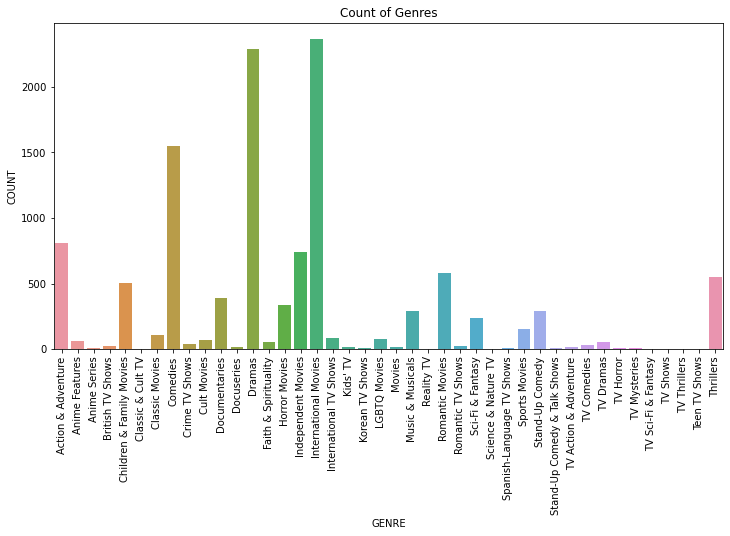

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(x="listed_in",y="director",data=genre_count)
plt.title("Count of Genres")
plt.xlabel("GENRE")
plt.ylabel("COUNT")
plt.xticks(rotation=90)

Insight: Remarkably more popular Genre with maximum number of Movies and TV shows are: 
 - International Movies
 - Dramas
 - Comedies
 - Action and Adventure
 - Independant Movies
 - Romantic Movies
 - Thrillers
 - Children and Family Movies

In [56]:
#finding the top 30 actors

data_cast_title = data[["title","cast"]]
data_cast_title.head()

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,Jailbirds New Orleans,NaN
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."


In [57]:
data_cast_title.dropna(inplace=True) #removing null Values

In [58]:
data_cast_title["cast"] = data_cast_title["cast"].str.split(", ")
data_cast_title = data_cast_title.explode("cast")

In [59]:
actors = data_cast_title.groupby("cast").count().reset_index().sort_values("title",ascending= False)
top_30_actors = actors[:30]
data_cast_title

,title,cast
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba
1,Blood & Water,Dillon Windvogel
...,...,...
8806,Zubaan,Manish Chaudhary
8806,Zubaan,Meghna Malik
8806,Zubaan,Malkeet Rauni
8806,Zubaan,Anita Shabdish


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Anupam Kher'),
  Text(1, 0, 'Shah Rukh Khan'),
  Text(2, 0, 'Julie Tejwani'),
  Text(3, 0, 'Naseeruddin Shah'),
  Text(4, 0, 'Takahiro Sakurai'),
  Text(5, 0, 'Rupa Bhimani'),
  Text(6, 0, 'Akshay Kumar'),
  Text(7, 0, 'Om Puri'),
  Text(8, 0, 'Yuki Kaji'),
  Text(9, 0, 'Amitabh Bachchan'),
  Text(10, 0, 'Paresh Rawal'),
  Text(11, 0, 'Boman Irani'),
  Text(12, 0, 'Vincent Tong'),
  Text(13, 0, 'Rajesh Kava'),
  Text(14, 0, 'Andrea Libman'),
  Text(15, 0, 'Kareena Kapoor'),
  Text(16, 0, 'John Cleese'),
  Text(17, 0, 'Samuel L. Jackson'),
  Text(18, 0, 'Jigna Bhardwaj'),
  Text(19, 0, 'Tara Strong'),
  Text(20, 0, 'Fred Tatasciore'),
  Text(21, 0, 'Daisuke Ono'),
  Text(22, 0, 'Nawazuddin Siddiqui'),
  Text(23, 0, 'Ashleigh Ball'),
  Text(24, 0, 'Kay Kay Menon'),
  Text(25, 0, 'Nicolas Cage'),
  Text(26, 0, 'Ajay Devgn'),
  Text(27, 0, 

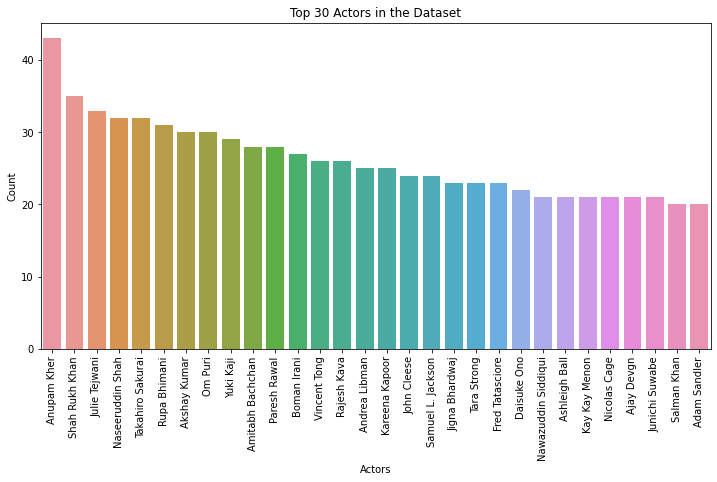

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(x="cast",y="title",data= top_30_actors)
plt.title("Top 30 Actors in the Dataset")
plt.xlabel("Actors")
plt.ylabel("Count")
plt.xticks(rotation=90)

Insight: These are the top 30 most popular actors on Netflix. Popularity of these actors play a role in making a movie or TV series more successful.

Text(0.5, 1.0, 'Boxplot for release years of Movies and TV Shows')

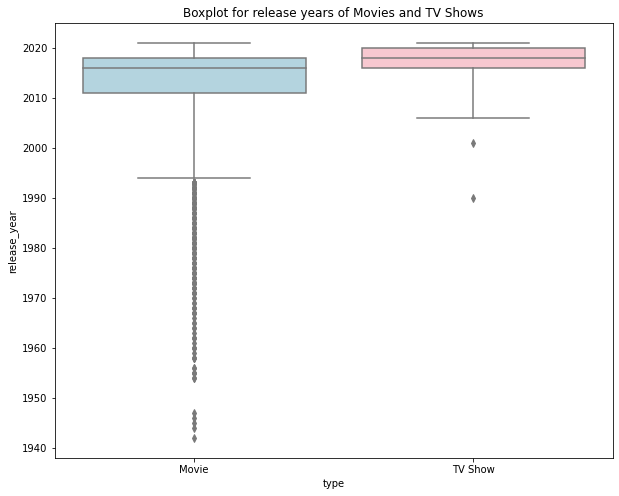

In [61]:
plt.figure(figsize=(10,8))
sns.boxplot(x="type",y="release_year",data=data_no_null,palette=["lightblue","pink"],whis=2.5)
plt.title("Boxplot for release years of Movies and TV Shows")

Insight: From the boxplot it can be seen:-
 - Outliers are more in Movies than in TV shows
 - TV shows has gained more popularity in the recent years
 - But overall the number of Movies are more on Netflix

<h2>Conclusion :<h2>

<u>BUISNESS INSIGHTS:</u> 

From General Analysis:
 - Rajiv Chilaka has directed the most number of films in this dataset.
 - Ken Burns and Alastair Fothergill have directed the most number of TV shows.
 - Director Martin Scorsese has casted maximum number of actors.
 
 - United States by far has the most number of movies and TV shows.
 - United States, India, United Kingdom, Canada and Japan are the top 5 countries where most actors where involved during production.
 
 - Dramas, International Movies, Documentaries and Stand-up Comedies are the top generes.
 - TV-MA, TV-14, R, TV-PG, PG-13 are the 5 most common TV ratings given to the directors' movies and series.
 - There are 3 anomalous ratings: 74 min, 84 min, 66 min, could be outliers.
 
From Visual Analysis:
 - Movies are more than TV shows.
 - Maximum release is in the recent years around 2020.
 - Movies with the duration of 90 to 100 minutes are mostly preferred thus has maximum count.
 - Netflix has more TV shows with single seasons which increases the variety for viewers.
 

<h4>RECOMMENDATIONS:</h4> 

- Most movies have a time duration of 80 - 120 minutes. This might suggest that movies of such durations are watched more by the audience and is hence preferred by the directors. Netflix could add more movies of similar durations to increase the viewership
- TV Series with a singular seasons seem to be more often produced. This might suggest single season serieses might be more popular among the audience. Adding or producing more tv shows with singular season might bring more variety in the platform.
- It can be observed that a large number of shows and movies are directed towards mature audiences. This might suggest that most media is consumed primarily by adult people. Shows and movies targeting mature audience might increase the watchtime.
- The top 5 most popular genres are :
 1. International Movies
 2. Dramas
 3. Comedies
 4. Action & Adventure
 5. Independent Movies
 
- This might suggest that these are the genres which are most watched by the viewers, hence the directors are more likely to make movies and shows on these genres. Adding/producing movies/tv shows based on these genres almost guarantees the increase of media consumption.

- The top 30 most popular actors in the dataset. Perhaps the popularity and skill of these actors play a role in making a movie or series successful. Netflix should use the potential of these powerful actors while adding/Producing more movies and tv shows to their platform.